# Test Filtering

This script has test cases to help you test `my_imfilter()`, which you will write. You should verify that you get reasonable output here before using your filtering to construct a hybrid image in `proj1.py`. The outputs are all saved and you can include them in your writeup. You can add calls to OpenCV's `filter2D()` if you want to check that `my_imfilter()` is doing something similar.

## Setup

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils import load_image, save_image, im_range, vis_hybrid_image
from student_code import my_imfilter
# %matplotlib notebook

test_image = load_image('../data/cat.bmp')
test_image = cv2.resize(test_image, (0, 0), fx=0.7, fy=0.7)

## Identity filter
This filter should do nothing regardless of the padding method you use.

[[0.8105642  0.6630252  0.4657463 ]
 [0.74763906 0.5513606  0.3137455 ]
 [0.67432976 0.44633853 0.20458184]
 [0.65140057 0.3844538  0.13627452]
 [0.67789114 0.38759506 0.12232894]
 [0.6679472  0.38113245 0.12036815]
 [0.6094238  0.30786315 0.06994798]
 [0.57156867 0.25522208 0.05      ]
 [0.5514606  0.21532613 0.03409364]
 [0.50532216 0.1887355  0.00330132]
 [0.5285714  0.20938376 0.01162465]
 [0.5866747  0.24667868 0.02436975]
 [0.64103645 0.28183275 0.0502601 ]
 [0.67961186 0.32629052 0.08417367]
 [0.7196879  0.39203683 0.19133654]
 [0.742417   0.4435374  0.29591838]
 [0.70492196 0.43137255 0.29279712]
 [0.6805322  0.41806725 0.2302521 ]
 [0.64833933 0.40060025 0.1554822 ]
 [0.6380153  0.39237696 0.14585835]
 [0.6770508  0.43615445 0.18105243]
 [0.71066433 0.47294918 0.21190476]
 [0.7348939  0.5032213  0.25550222]
 [0.7432773  0.4902361  0.30676273]
 [0.71848744 0.4532213  0.29957986]
 [0.6916167  0.4219288  0.25832334]
 [0.6402361  0.38105243 0.18927571]
 [0.59767914 0.34863946 0.13

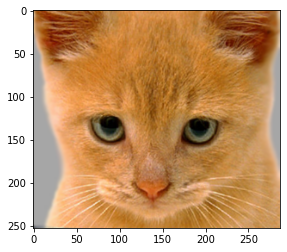

In [18]:
identity_filter = np.asarray([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
identity_image = my_imfilter(test_image, identity_filter)
print(identity_image[0])
plt.imshow(identity_image)
done = save_image('../results/identity_image.jpg', identity_image)

## Small blur with a box filter
This filter should remove some high frequencies.

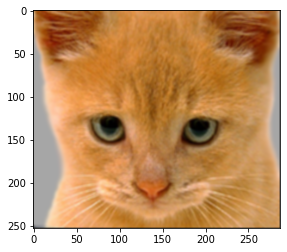

In [19]:
blur_filter = np.ones((3, 3))
blur_filter /= np.sum(blur_filter)  # making the filter sum to 1
blur_image = im_range(my_imfilter(test_image, blur_filter))
plt.imshow(blur_image)
done = save_image('../results/blur_image.jpg', blur_image)

## Large blur
This blur would be slow to do directly, so we instead use the fact that Gaussian blurs are separable and blur sequentially in each direction.

(25, 1)


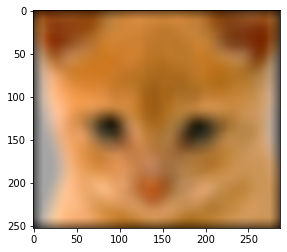

In [20]:
large_1d_blur_filter = cv2.getGaussianKernel(ksize=25, sigma=10)
print(large_1d_blur_filter.shape)
large_blur_image = my_imfilter(test_image, large_1d_blur_filter)
# notice the T operator which transposes the filter
large_blur_image = im_range(my_imfilter(large_blur_image, large_1d_blur_filter.T))
plt.imshow(large_blur_image)
done = save_image('../results/large_blur_image.jpg', large_blur_image)

If you want to see how slow this would be to do naively, try out this equivalent operation:

In [21]:
import time
large_blur_filter = np.dot(large_1d_blur_filter, large_1d_blur_filter.T)
t = time.time()
large_blur_image = my_imfilter(test_image, large_blur_filter)
t = time.time() - t
print('{:f} seconds'.format(t))

2.206017 seconds


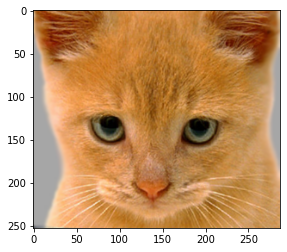

In [22]:
plt.imshow(test_image)

## Oriented filter (Sobel operator)

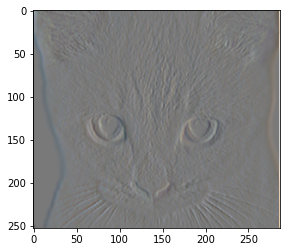

In [23]:
sobel_filter = np.asarray([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # should respond to horizontal gradients
sobel_image = my_imfilter(test_image, sobel_filter)

sobel_image = im_range(sobel_image)
plt.imshow(sobel_image)
done = save_image('../results/sobel_image.jpg', sobel_image)

## High pass filter (discrete Laplacian)

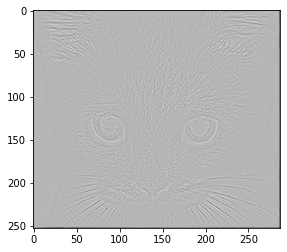

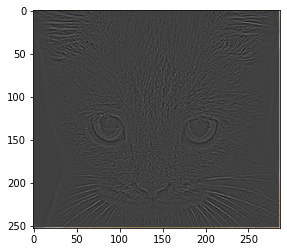

In [24]:
from utils import im2single


test_image = load_image('../data/cat.bmp')
test_image = cv2.resize(test_image, (0, 0), fx=0.7, fy=0.7)

laplacian_filter = np.asarray([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian_image = my_imfilter(test_image, laplacian_filter)

laplacian_image = im_range(laplacian_image)
plt.figure(); 
plt.imshow(laplacian_image)
done = save_image('../results/laplacian_image.jpg', laplacian_image)

# High pass "filter" alternative
high_pass_image = test_image - blur_image
high_pass_image = im_range(high_pass_image)
plt.figure()
plt.imshow(high_pass_image)
# plt.imshow(im2single(high_pass_image))
done = save_image('../results/high_pass_image.jpg', high_pass_image)